<a href="https://colab.research.google.com/github/Ghasememami/ML/blob/main/MP1/Mini_project1_ghasem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1**

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

(1000, 3) (1000,)


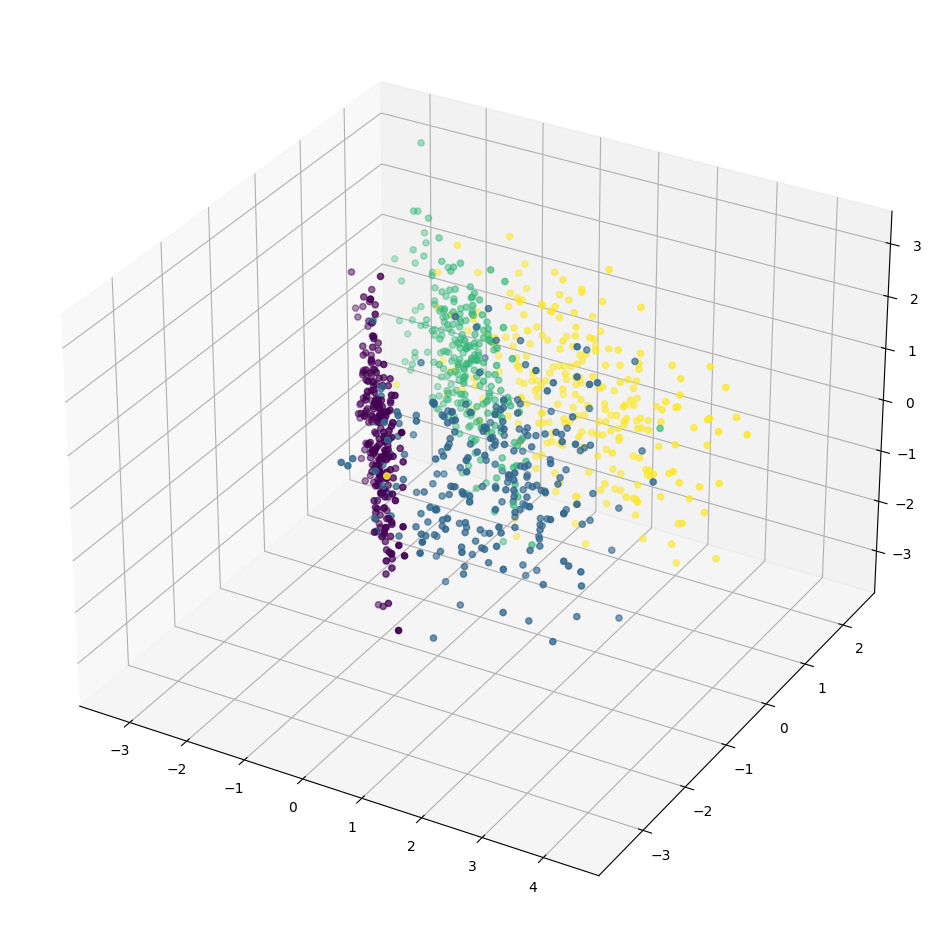

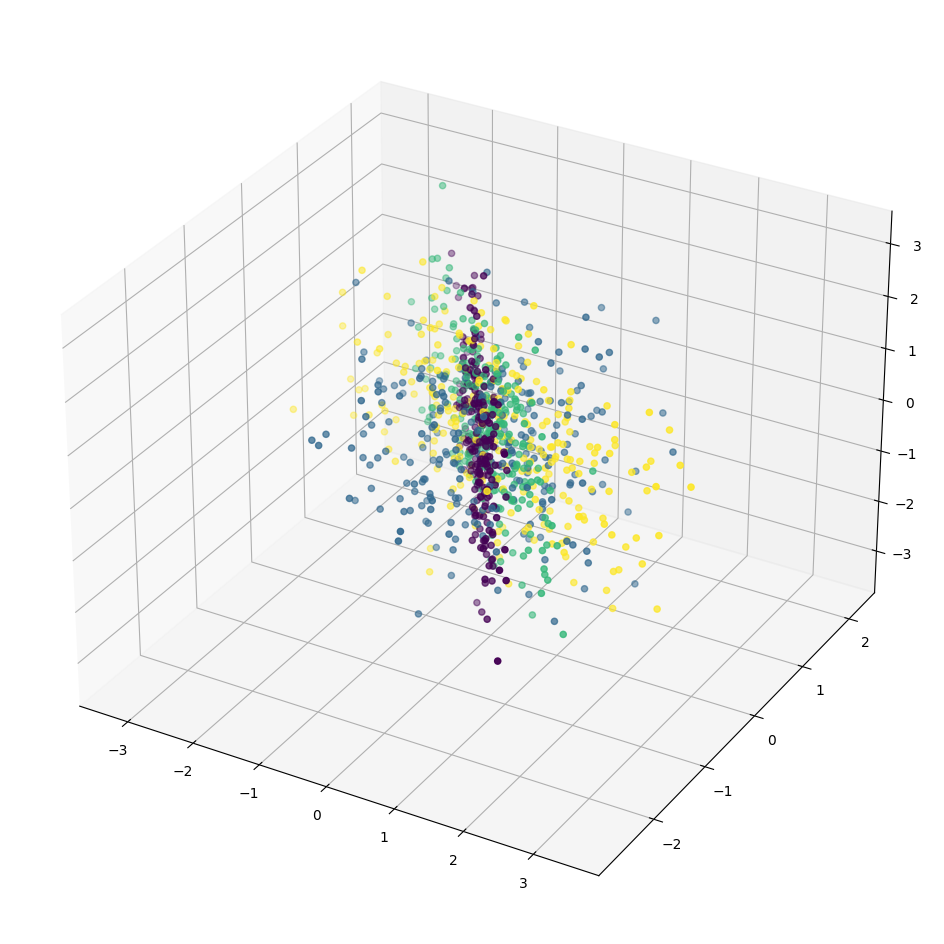

In [260]:
X,y = make_classification(n_samples = 1000, n_features = 3 , n_redundant = 0 , n_classes = 4 , n_clusters_per_class = 1 , class_sep = 1 , random_state = 14)
print(X.shape , y.shape )
X_new, y_new = make_classification(n_samples = 1000, n_features = 3 , n_redundant = 0 , n_classes = 4 , n_clusters_per_class = 1 , class_sep = 0.1 , random_state = 14)


fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.scatter(X[:,0], X[:,1], X[:,2], c = y)
fig =  plt.figure()
ax2 = plt.axes(projection='3d')
ax2.scatter(X_new[:,0], X_new[:,1], X_new[:,2], c = y_new)



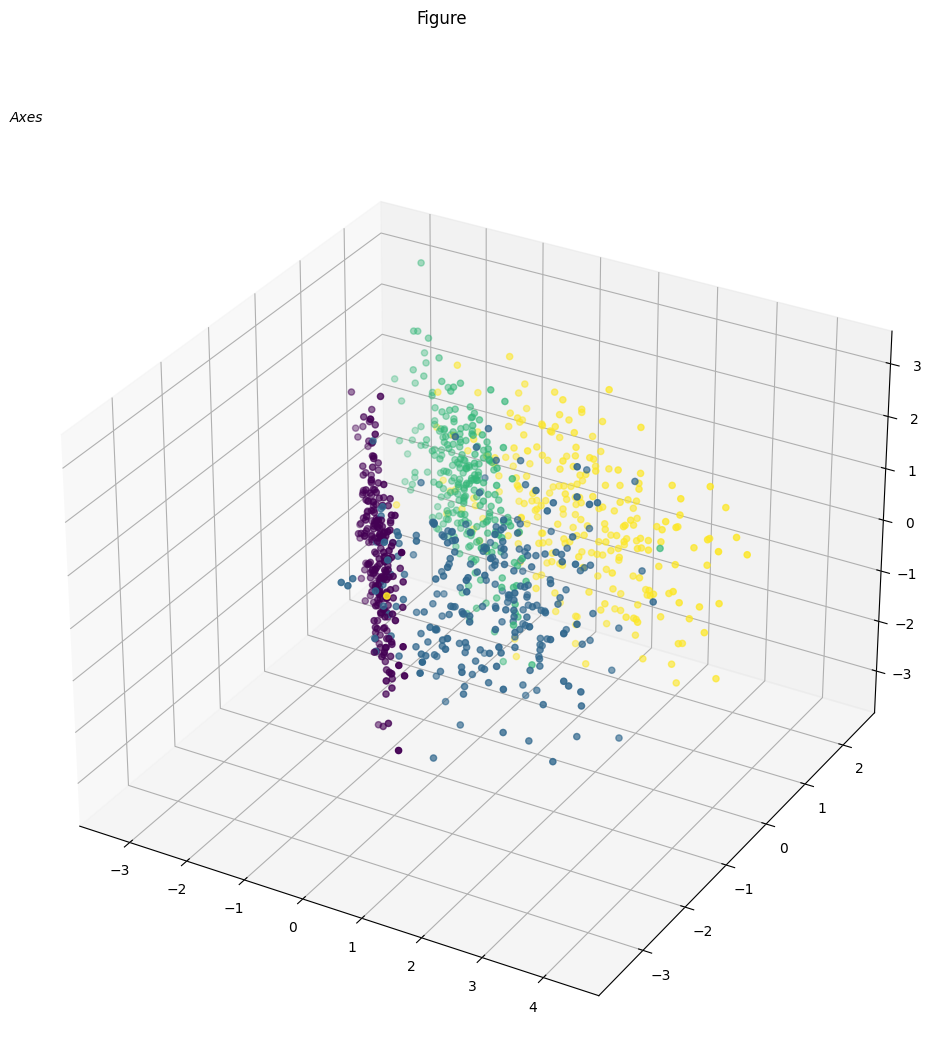

In [261]:
fig = plt.figure()
ax = plt.axes(projection='3d')
fig.suptitle('Figure')
ax.set_title('Axes', loc='left', fontstyle='oblique', fontsize='medium')
ax.scatter(X[:,0], X[:,1], X[:,2], c = y_new)



In [262]:
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800,), (200,))

In [263]:
model = LogisticRegression(random_state = 14) ;
model.fit(x_train,y_train)
model.predict(x_test),y_test

(array([3, 2, 1, 0, 2, 2, 0, 1, 0, 0, 3, 0, 0, 0, 2, 3, 2, 0, 3, 3, 3, 0,
        0, 2, 1, 1, 1, 0, 0, 3, 3, 3, 3, 1, 0, 0, 3, 0, 2, 2, 0, 2, 0, 2,
        3, 1, 2, 3, 0, 0, 1, 1, 2, 3, 2, 1, 2, 0, 3, 2, 1, 1, 2, 3, 3, 3,
        1, 1, 3, 2, 3, 0, 3, 3, 3, 3, 1, 2, 1, 2, 1, 3, 1, 3, 0, 1, 2, 2,
        2, 0, 0, 1, 0, 0, 3, 2, 2, 2, 0, 2, 3, 0, 3, 2, 3, 0, 1, 0, 0, 3,
        0, 1, 1, 3, 2, 0, 2, 1, 0, 3, 0, 1, 3, 0, 2, 0, 3, 3, 1, 1, 1, 3,
        1, 3, 0, 3, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 1, 1, 3,
        1, 1, 3, 1, 0, 3, 3, 3, 3, 2, 0, 3, 1, 0, 0, 0, 3, 2, 0, 3, 3, 1,
        0, 2, 3, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 3, 0, 0, 2, 0, 2, 3, 0, 2,
        3, 1]),
 array([3, 2, 0, 0, 3, 2, 0, 1, 0, 0, 3, 0, 0, 0, 2, 3, 2, 0, 3, 3, 3, 1,
        0, 2, 1, 1, 1, 0, 0, 1, 3, 3, 3, 1, 0, 0, 3, 0, 2, 3, 0, 2, 0, 3,
        3, 1, 2, 3, 0, 0, 1, 1, 2, 3, 2, 1, 2, 1, 3, 2, 1, 1, 2, 3, 3, 3,
        1, 1, 3, 2, 3, 1, 3, 3, 3, 3, 1, 1, 2, 2, 1, 3, 1, 3, 0, 2, 2, 2,
        2, 1, 0, 1, 0,

In [276]:
#model.predict_proba(x_test),y_test

In [266]:

print(f"the accuracy of training data is : {model.score(x_train, y_train) * 100} %")
print(f"the accuracy of the test data is : {model.score(x_test,y_test) * 100} %")

the accuracy of training data is : 90.25 %
the accuracy of the test data is : 89.0 %


In [269]:
parameters = {
    'solver' : ('lbfgs', 'liblinear', 'newton-cg', 'saga'),#'newton-cholesky'
    'penalty' :('l1', 'l2'),
    'max_iter':[100,1000,10000]
    }


reg_model  =  GridSearchCV(model, parameters)
reg_model.fit(x_train, y_train)

print(f"the parameters which cause best performances are:\n {reg_model.best_params_}\n")
print(f"the accuracy of training data is : {reg_model.score(x_train,y_train) * 100} %")
print(f"the accuracy of the test data is : {reg_model.score(x_test,y_test) * 100 } %")
print("---------------------------")

the parameters which cause best performances are:
 {'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

the accuracy of training data is : 90.25 %
the accuracy of the test data is : 90.0 %
---------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [270]:
model_2 = SGDClassifier(random_state = 14) ;
model_2.fit(x_train,y_train)
model_2.predict(x_test),y_test

(array([3, 2, 1, 0, 2, 2, 0, 1, 0, 0, 3, 0, 0, 0, 2, 3, 2, 0, 1, 3, 3, 0,
        0, 2, 1, 1, 1, 0, 0, 1, 3, 3, 3, 1, 0, 0, 3, 0, 2, 2, 0, 2, 0, 2,
        3, 1, 2, 1, 0, 0, 1, 1, 2, 3, 2, 1, 2, 0, 3, 1, 1, 1, 2, 3, 1, 3,
        1, 1, 3, 2, 3, 0, 3, 3, 3, 3, 1, 2, 1, 2, 1, 3, 1, 3, 0, 1, 2, 2,
        2, 1, 0, 1, 0, 0, 3, 2, 2, 2, 0, 1, 1, 0, 3, 2, 3, 0, 1, 0, 0, 3,
        0, 1, 1, 3, 2, 0, 2, 1, 0, 3, 0, 1, 3, 0, 2, 0, 3, 3, 1, 1, 1, 3,
        1, 3, 0, 3, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 1, 1, 3,
        1, 1, 3, 1, 0, 3, 3, 3, 3, 2, 0, 3, 1, 0, 0, 0, 3, 2, 0, 3, 1, 1,
        0, 2, 3, 2, 2, 2, 2, 0, 0, 1, 1, 2, 0, 3, 0, 0, 2, 0, 2, 3, 0, 2,
        3, 1]),
 array([3, 2, 0, 0, 3, 2, 0, 1, 0, 0, 3, 0, 0, 0, 2, 3, 2, 0, 3, 3, 3, 1,
        0, 2, 1, 1, 1, 0, 0, 1, 3, 3, 3, 1, 0, 0, 3, 0, 2, 3, 0, 2, 0, 3,
        3, 1, 2, 3, 0, 0, 1, 1, 2, 3, 2, 1, 2, 1, 3, 2, 1, 1, 2, 3, 3, 3,
        1, 1, 3, 2, 3, 1, 3, 3, 3, 3, 1, 1, 2, 2, 1, 3, 1, 3, 0, 2, 2, 2,
        2, 1, 0, 1, 0,

In [272]:

print(f"the accuracy of training data is : {model_2.score(x_train, y_train) * 100 } %")
print(f"the accuracy of the test data is : {model_2.score(x_test,y_test) * 100 } %")

the accuracy of training data is : 88.625 %
the accuracy of the test data is : 90.0 %


In [275]:

parameters_2 = {
    'loss' : ('hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error'),
    'penalty' : ('l2', 'l1', 'elasticnet','None'),
    'max_iter' : [100,1000 , 10000],
}

sgd_model =  RandomizedSearchCV(model_2, parameters_2, random_state = 14)
sgd_model.fit(x_train,y_train)

print(f"the parameters which cause best performances are:\n {sgd_model.best_params_}\n")
print(f"the accuracy of training data is : {sgd_model.score(x_train,y_train) * 100 } %")
print(f"the accuracy of the test data is : {sgd_model.score(x_test,y_test) * 100 } %")
print("===========================================================")

the parameters which cause best performances are:
 {'penalty': 'l2', 'max_iter': 1000, 'loss': 'log_loss'}

the accuracy of training data is : 88.375 %
the accuracy of the test data is : 87.5 %


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 891, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packa

In [274]:
# x1_min , x2_min , x3_min = X.min(0)
# x1_max , x2_max , x3_max = X.max(0)

# n = 1000
# x1r = np.linspace(x1_min, x1_max, n)
# x2r = np.linspace(x2_min, x2_max, n)
# x3r = np.linspace(x3_min, x3_max, n)

# x1m , x2m = np.meshgrid(x1r, x2r)

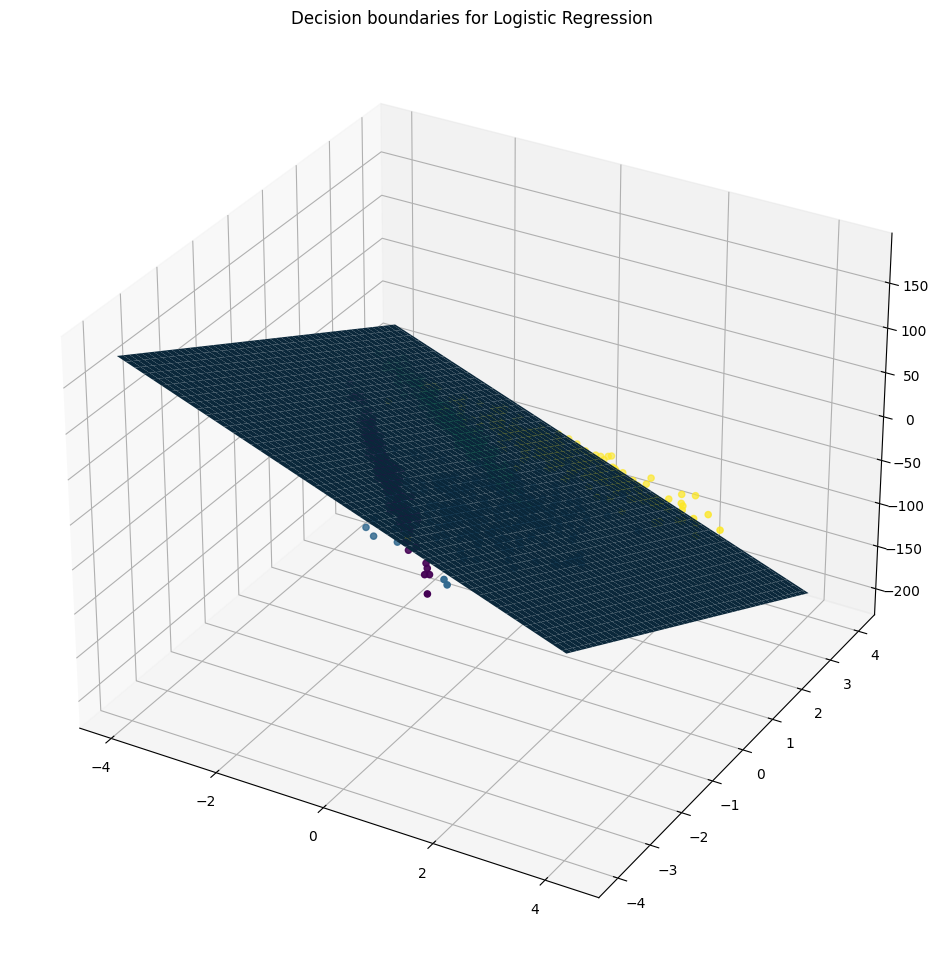

In [278]:
z1 = lambda x1, y1: (-model.intercept_[0]-model.coef_[0][0]*x1-model.coef_[0][1]*y1) / model.coef_[0][2]

tmp = np.linspace(-4, 4,100)
x1,y1 = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, y1, z1(x1,y1))
ax.scatter(X[:,0], X[:,1], X[:,2], c = y)
ax.set_title('Decision boundaries for Logistic Regression')
plt.show()

NameError: name 'model_2' is not defined

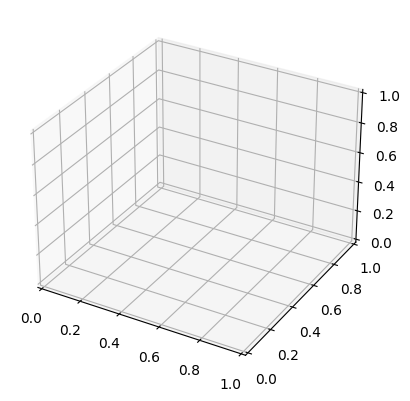

In [10]:
z2 = lambda x2, y2: (-model_2.intercept_[0]-model_2.coef_[0][0]*x2-model_2.coef_[0][1]*y2) / model_2.coef_[0][2]

tmp = np.linspace(-4, 4,100)
x2,y2 = np.meshgrid(tmp,tmp)

# Plot stuff.
fig2 = plt.figure()
ax2  = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(x2, y2, z2(x2,y2))
ax2.scatter(X[:,0], X[:,1], X[:,2], c = y)
ax.view_init(elev=6, azim=-10)
ax2.set_title('Decision boundaries for SGD Classifier')
plt.show()

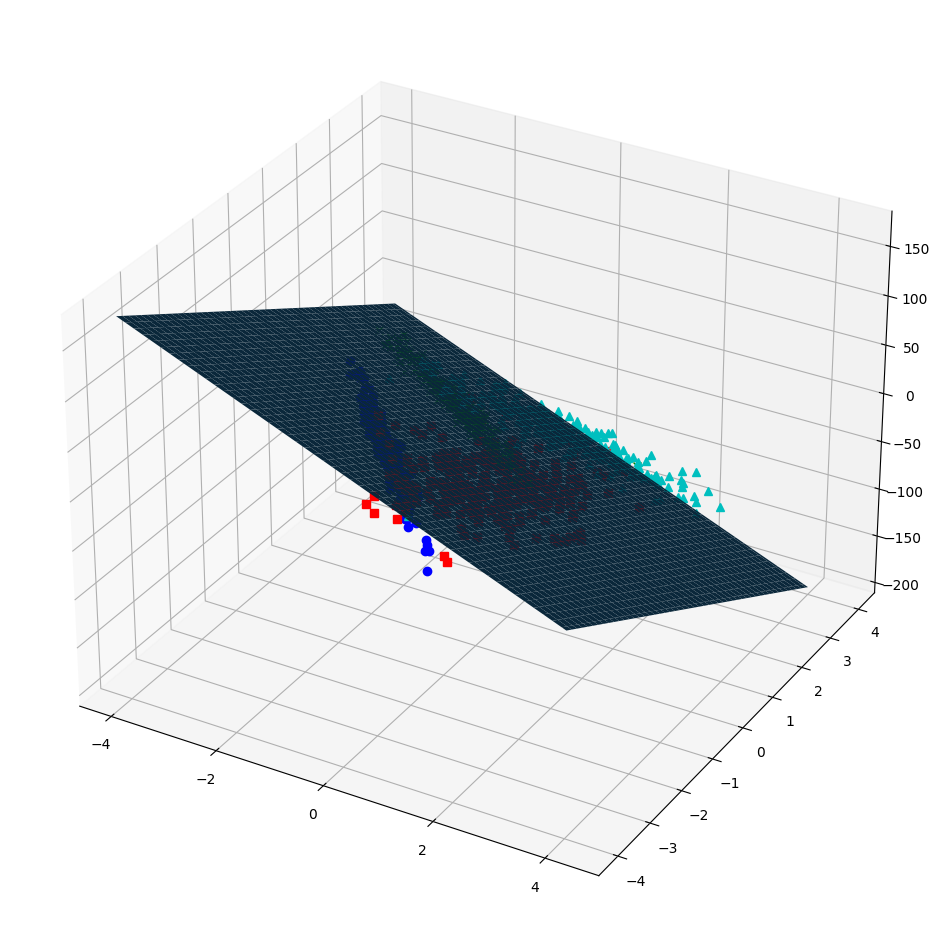

In [280]:
from mpl_toolkits.mplot3d import Axes3D

z1 = lambda x1,y1: (-model.intercept_[0]-model.coef_[0][0]*x1-model.coef_[0][1]*y1) / model.coef_[0][2]

tmp = np.linspace(-4,4,100)
x1,y1 = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, y1, z1(x1,y1))

ax.plot3D(X[y==0,0], X[y==0,1], X[y==0,2],'ob')
ax.plot3D(X[y==1,0], X[y==1,1], X[y==1,2],'sr')
ax.plot3D(X[y==2,0], X[y==2,1], X[y==2,2],'xg')
ax.plot3D(X[y==3,0], X[y==3,1], X[y==3,2],'^c')

# Set the initial view angle for rotation
# ax.view_init(elev=90, azim=0)

plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#!pip install drawdata
from drawdata import ScatterWidget

In [2]:
dataset = ScatterWidget()
dataset

ScatterWidget()

In [28]:
X = dataset.data_as_pandas[['x','y']]
Y = dataset.data_as_pandas['label']

print(X.shape,Y.shape)

(905, 2) (905,)


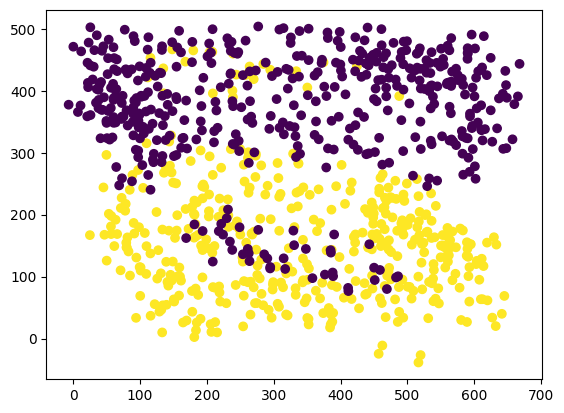

In [29]:
Label = np.zeros(len(Y))
for i , label  in enumerate(Y):
  if label == 'a' :
    Label[i] = 1
plt.scatter(X['x'],X['y'], c=Label)

In [30]:
x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size = 0.2, random_state = 14)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((724, 2), (181, 2), (724,), (181,))

In [31]:
model_new = LogisticRegression(random_state = 14) ;
model_new.fit(x_train,y_train)
#model_new.predict(x_test),y_test
print(f"the accuracy of training data is : {model_new.score(x_train, y_train) * 100} %")
print(f"the accuracy of the test data is : {model_new.score(x_test,y_test) * 100} %")

the accuracy of training data is : 89.50276243093923 %
the accuracy of the test data is : 87.84530386740332 %


In [32]:
parameters = {
    'solver' : ('lbfgs', 'liblinear', 'newton-cg', 'saga'),#'newton-cholesky'
    'penalty' :('l1', 'l2'),
    'max_iter':[100,1000,10000]
    }


reg_model  =  GridSearchCV(model_new, parameters)
reg_model.fit(x_train, y_train)

print(f"the parameters which cause best performances are:\n {reg_model.best_params_}\n")
print(f"the accuracy of training data is : {reg_model.score(x_train,y_train) * 100} %")
print(f"the accuracy of the test data is : {reg_model.score(x_test,y_test) * 100 } %")
print("---------------------------")

the parameters which cause best performances are:
 {'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

the accuracy of training data is : 89.3646408839779 %
the accuracy of the test data is : 87.84530386740332 %
---------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [33]:
model_2_new = SGDClassifier(random_state = 14) ;
model_2_new.fit(x_train,y_train)
#model_2_new.predict(x_test),y_test

print(f"the accuracy of training data is : {model_2_new.score(x_train, y_train) * 100 } %")
print(f"the accuracy of the test data is : {model_2_new.score(x_test,y_test) * 100 } %")


the accuracy of training data is : 76.65745856353591 %
the accuracy of the test data is : 77.90055248618785 %


In [34]:
parameters_2 = {
    'loss' : ('hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error'),
    'penalty' : ('l2', 'l1', 'elasticnet','None'),
    'max_iter' : [100,1000 , 10000],
}

sgd_model =  RandomizedSearchCV(model_2_new, parameters_2, random_state = 14)
sgd_model.fit(x_train,y_train)

print(f"the parameters which cause best performances are:\n {sgd_model.best_params_}\n")
print(f"the accuracy of training data is : {sgd_model.score(x_train,y_train) * 100 } %")
print(f"the accuracy of the test data is : {sgd_model.score(x_test,y_test) * 100 } %")
print("===========================================================")

the parameters which cause best performances are:
 {'penalty': 'l2', 'max_iter': 1000, 'loss': 'log_loss'}

the accuracy of training data is : 50.966850828729285 %
the accuracy of the test data is : 54.14364640883977 %


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 891, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packa

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


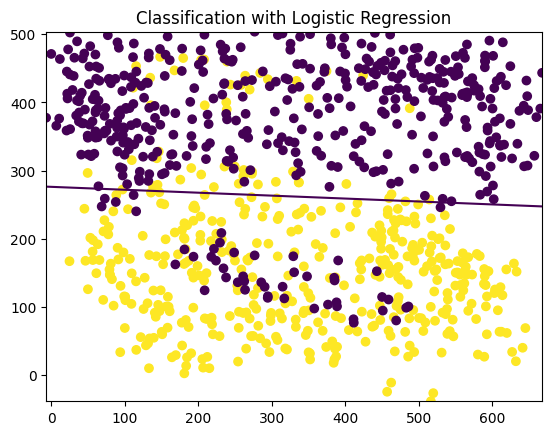

In [35]:
x1_min , x2_min  = X.min(0)
x1_max , x2_max  = X.max(0)

n = 1000
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)

x1m , x2m = np.meshgrid(x1r, x2r)
Xm = np.stack((x1m.flatten(), x2m.flatten()), axis = 1)

Y1 = reg_model.decision_function(Xm)
plt.scatter(X['x'],X['y'], c=Label)
plt.contour(x1m, x2m, Y1.reshape(x1m.shape), levels=[0])

plt.title('Classification with Logistic Regression')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


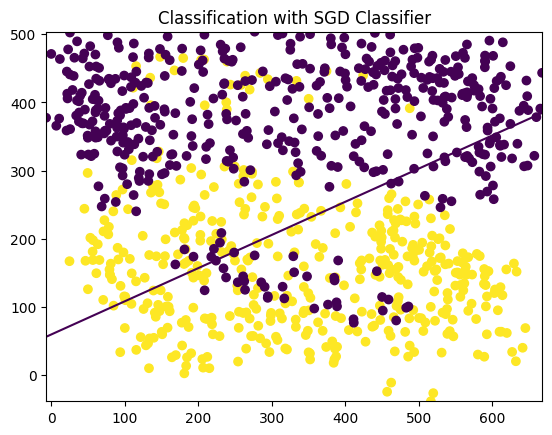

In [39]:
Y2 = model_2_new.decision_function(Xm)

plt.scatter(X['x'],X['y'], c=Label)
plt.contour(x1m, x2m, Y2.reshape(x1m.shape), levels=[0])

plt.title('Classification with SGD Classifier')
plt.show()

# **Question 2**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import sys
import random

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import PredictionErrorDisplay


# np.set_printoptions(threshold=sys.maxsize)

In [18]:
!pip install --upgrade --no-cach-dir gdown

!gdown 1fKJkkiMHY8L5GsKssvRbaTv5KyFv_a4y
!gdown 1IhopQzNJ8r_Qv5ZPGISlYxpujISJs63G



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cach-dir
Downloading...
From (original): https://drive.google.com/uc?id=1fKJkkiMHY8L5GsKssvRbaTv5KyFv_a4y
From (redirected): https://drive.google.com/uc?id=1fKJkkiMHY8L5GsKssvRbaTv5KyFv_a4y&confirm=t&uuid=506f6926-4287-47fe-a998-58ac24e82b5e
To: /content/Normal_2.mat
100% 15.5M/15.5M [00:00<00:00, 41.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1IhopQzNJ8r_Qv5ZPGISlYxpujISJs63G
From (redirected): https://drive.google.com/uc?id=1IhopQzNJ8r_Qv5ZPGISlYxpujISJs63G&confirm=t&uuid=16543a38-e9b4-4cc2-b9a0-1bff8f9f4c6e
To: /content/IR007_2.mat
100% 2.93M/2.93M [00:00<00:00, 163MB/s]


at first we load data as datafrmae with pd.Datafram and then from that data we collect X098_DE_time class. we do same steps for the fault data where as we collect X107_DE_time class.


In [19]:

df_normal = pd.DataFrame(sio.loadmat('Normal_2.mat')['X098_DE_time'])
df_fault = pd.DataFrame(sio.loadmat('IR007_2.mat')['X107_DE_time'])

In [20]:
print(f" the size of the normal data is :{df_normal.shape} \n the size of the fault data is :{df_fault.shape}")

 the size of the normal data is :(483903, 1) 
 the size of the fault data is :(122136, 1)


In [21]:
print(f" normal data is :\n {df_normal[0:20]} \n and fault data is:\n  {df_fault[0:20]}")

 normal data is :
            0
0   0.046104
1  -0.037134
2  -0.089496
3  -0.084906
4  -0.038594
5   0.025451
6   0.040680
7   0.042558
8   0.038177
9   0.044018
10  0.042140
11 -0.011474
12 -0.076770
13 -0.147074
14 -0.152915
15 -0.095546
16 -0.030875
17  0.028998
18  0.031292
19  0.018567 
 and fault data is:
             0
0  -0.093238
1   0.187288
2   0.217663
3   0.070172
4   0.100385
5   0.156587
6  -0.011208
7  -0.132060
8  -0.127512
9  -0.157887
10 -0.150740
11 -0.040446
12  0.135308
13 -0.035086
14 -0.256485
15 -0.038822
16  0.065786
17 -0.186151
18 -0.157887
19  0.216688


here we wnat to make M groups of data that each one contain N elements to make features matrices. at first we make total_data matrix which contaion M groups of data.more over we add the normal data to the head of the list and fault data to the end of the matrix. then, we allocate the label 1 to the normal data and 0 to fault data and then we add these labels to the totla_label matrix according to the total_data. with according to the code we have 600 groups of array that each one has 300 elements so totlly we collect 180,000 elements of the data set.

In [7]:
M = 300
N = 300

total_data = []
total_label = []

for i in range(M):

  total_data.append(df_fault[ i * N : ( i + 1 ) * N ])
  total_data.insert( 0 , df_normal[ i * N : ( i + 1 ) * N ] )
  total_label.append(0)
  total_label.insert(0,1)

print(f" number of array of total data is :\n{len(total_data)} \n and number of elements of each array is:\n{len(total_data[0])}")
print("---------------------------------")
print(f" number of array of total label is :\n{len(total_label)} \n and number of elements of each label is:\n{total_label[0]}")
print("=================================")
print(f" total data is :\n {total_data[0:5]} \n and total label is:\n  {total_label[0:5]}")


 number of array of total data is :
600 
 and number of elements of each array is:
300
---------------------------------
 number of array of total label is :
600 
 and number of elements of each label is:
1
 total data is :
 [              0
89700 -0.040263
89701 -0.022948
89702  0.001460
89703  0.023365
89704  0.000834
...         ...
89995  0.072598
89996  0.000834
89997 -0.037759
89998 -0.028998
89999  0.031501

[300 rows x 1 columns],               0
89400 -0.058830
89401 -0.062585
89402 -0.094294
89403 -0.114321
89404 -0.071764
...         ...
89695 -0.046730
89696 -0.001252
89697  0.022322
89698  0.015855
89699 -0.020653

[300 rows x 1 columns],               0
89100 -0.015229
89101 -0.033170
89102 -0.017941
89103  0.004590
89104  0.000000
...         ...
89395  0.004590
89396 -0.040054
89397 -0.075727
89398 -0.089079
89399 -0.078857

[300 rows x 1 columns],               0
88800  0.001669
88801 -0.009805
88802 -0.049233
88803 -0.111192
88804 -0.125378
...         ...
89095 -0.01

inverting the data tp array to make it easier to work with and have access to variables of it.


In [8]:
total_data = np.array(total_data)
total_label = np.array(total_label)
total_data = np.reshape(total_data,(2*M,N))
total_label = np.reshape(total_label,(2*M,1))

In [9]:
print(f"lenght of the normal_data is {len(total_data)}  and  lenght of each element is  {len(total_data[0])} ")
print(f"lenght of the fault_data is {len(total_label)}  ")

lenght of the normal_data is 600  and  lenght of each element is  300 
lenght of the fault_data is 600  


In [10]:
data_feature_class = np.zeros(shape = (2*M,8))


for k in range(M):
  feature_data = np.zeros((1,8))
  feature_data[0,0] = np.mean(total_data[[k],:])
  feature_data[0,1] = np.std(total_data[[k],:])
  feature_data[0,2] = np.max(total_data[[k],:])
  feature_data[0,3] = np.max(total_data[k]) - np.min(total_data[k])
  feature_data[0,4] = np.mean(np.sqrt(abs(total_data[[k],:])))**2
  feature_data[0,5] = np.sqrt(np.mean((total_data[[k],:]**2)))
  feature_data[0,6] = np.mean(abs(total_data[[k],:]))
  feature_data[0,7] = np.max(total_data[[k],:]) / (np.mean(total_data[[k],:]))
  data_feature_class[[k],:] = feature_data



here we try to shuffle the the label data and total data with accoeding to the state number which is 14 for this case.we use both of them in the shffle function to shuddle them with according to each other it means that the each element will be shuffled with its specific label.

In [11]:
data_sh , label_sh = shuffle(data_feature_class , total_label , random_state = 14)

In [12]:
print(f"basoic label array is:\n {total_label[0:15]}\n")
print(f"shufled label array is:\n {label_sh[0:15]}")

basoic label array is:
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]

shufled label array is:
 [[1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]


here we extract test data and train data from each other. and the print the shape of each one to check out the results.

In [13]:
x_train , x_test , y_train , y_test = train_test_split(data_sh, label_sh, test_size = 0.2,  random_state = 14)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(480, 8) (120, 8) (480, 1) (120, 1)


here we want to normalize the data. at first we try to normalize the train data and use the MinMaxScaler method for the data . then we use the same way to normalize the test data . it is crucial to mention that the we normalize the test data as same as the train data , in the other say, the equation which used for train data is used for test data.

In [14]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

coding the gradinent descent and logreg method with sigmoid function to predict the vlaues.

In [15]:

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def logreg(x,w):
  y_hat = sigmoid(x @ w)
  return y_hat

def bce(y, y_hat):
  L = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
  return L

def gradient(x, y, y_hat):
  grad = (x.T @ (y_hat - y)) / len(y)
  return grad

def gradient_descent(w, eta, grad):
  w -= eta * grad
  return w

def accuracy(y, y_hat):
  accuracy = np.sum(y == np.round(y_hat)) / len(y)
  return accuracy




adding a column of 1 to the train data as bias .

In [16]:
x_train_norm_ext = np.hstack((np.ones((len(x_train_norm),1)), x_train_norm))

implementing the predicion model of the system and evaluate the system by calculating the error.

In [17]:
x_train_norm_ext.shape

(480, 9)

In [18]:
w = np.random.randn(9, 1)
eta = 0.05
n_epochs = 4000
total_error = []

for epoch in range(n_epochs):
  y_hat = logreg(x_train_norm_ext, w)

  error = bce(y_train, y_hat)
  total_error.append(error)

  grads = gradient(x_train_norm_ext, y_train, y_hat)

  w = gradient_descent(w, eta, grads)

  if (epoch) % 500 == 0:
    print(f"Epoch={epoch}, \t E={ error : .4}, \t w={w.T[0]}")

Epoch=0, 	 E= 0.5685, 	 w=[ 0.3109686   0.91098084 -0.63639126  0.66896876  0.22811983  1.30610885
  0.55668768 -0.26291838  0.48434207]
Epoch=500, 	 E= 0.08909, 	 w=[-1.88024494  1.27698658  0.10328324  1.33050781  0.92278111  2.07311351
  1.30529934  0.49901732 -0.45183185]
Epoch=1000, 	 E= 0.04605, 	 w=[-2.48095292  1.44486032  0.42017363  1.61339484  1.22077078  2.40144196
  1.62590878  0.82524754 -0.70093423]
Epoch=1500, 	 E= 0.03089, 	 w=[-2.83528298  1.54663512  0.61271882  1.78518813  1.40199672  2.60084259
  1.82068545  1.02340149 -0.84722088]
Epoch=2000, 	 E= 0.02322, 	 w=[-3.08621795  1.61951808  0.75089013  1.90843832  1.53213277  2.74388709
  1.9604459   1.16556554 -0.95058129]
Epoch=2500, 	 E= 0.01859, 	 w=[-3.28029075  1.6762542   0.85863168  2.00453188  1.63366327  2.85540086
  2.06941984  1.27640133 -1.03039757]
Epoch=3000, 	 E= 0.01551, 	 w=[-3.43842488  1.72268987  0.94693679  2.08328352  1.71691529  2.94677915
  2.15873071  1.3672297  -1.09535977]
Epoch=3500, 	 E= 0

ploting the total error according to the number of epochs.

final error is 0.011651527148260381



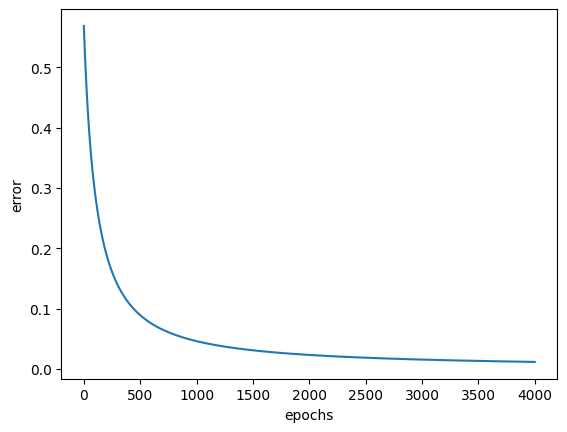

In [19]:
plt.plot(total_error)
plt.xlabel('epochs')
plt.ylabel('error')
print(f"final error is {error}\n")

adding column of 1s to the test data as bias.

In [20]:
x_test_norm_ext = np.hstack((np.ones((len(x_test_norm),1)), x_test_norm))


In [21]:
y_hat = logreg(x_test_norm_ext, w)
print(f"accuracy is {accuracy(y_test, y_hat )* 100}")

accuracy is 100.0


implementing the Precision method by code

In [22]:
def Precision (pred_label , real_label):
  TN = 0
  FN = 0
  for i in  pred_label :
    if pred_label[i][0] == 0 and  np.round(real_label[i][0]) == 0 :
      TN = TN + 1
    if pred_label[i][0] == 0 and  np.round(real_label[i][0]) == 1 :
      FN = FN + 1

  return TN / (TN + FN) * 100

print(f"the precision of the model is {Precision(y_test , y_hat)} % ")

the precision of the model is 100.0 % 


implementing the Accuracy method by code

In [23]:
def Accuracy (pred_label , real_label):
  TN = 0
  FN = 0
  TP = 0
  FP = 0
  for i in  pred_label :
    if pred_label[i][0] == 0 and  np.round(real_label[i][0]) == 0 :
      TN = TN + 1
    if pred_label[i][0] == 0 and  np.round(real_label[i][0]) == 1 :
      FN = FN + 1
    if pred_label[i][0] == 1 and  np.round(real_label[i][0]) == 1 :
      TP = TP + 1
    if pred_label[i][0] == 1 and  np.round(real_label[i][0]) == 0 :
      FP = FP + 1
  print(TN,TP,FN,FP)
  return (TN + TP) / (TP + TN + FN + FP) * 100

print(f"the precision of the model is {Accuracy(y_test , y_hat)} % ")

55 65 0 0
the precision of the model is 100.0 % 


using the skilearn library to import logistic regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
logreg = LogisticRegression(random_state = 14)
LogReg1 = logreg.fit(x_train_norm, y_train)

LG1_train_score = LogReg1.score(x_train_norm, y_train)
LG1_test_score = LogReg1.score(x_test_norm, y_test)

print('Accuracy of training data =',LG1_train_score*100,'%')
print('Accuracy of test data=',LG1_test_score*100,'%')

Accuracy of training data = 100.0 %
Accuracy of test data= 100.0 %


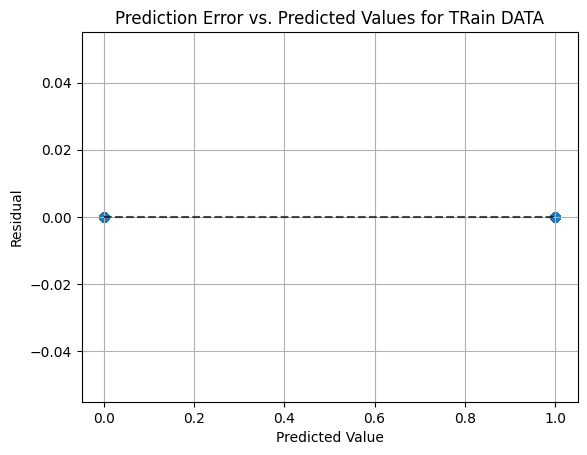

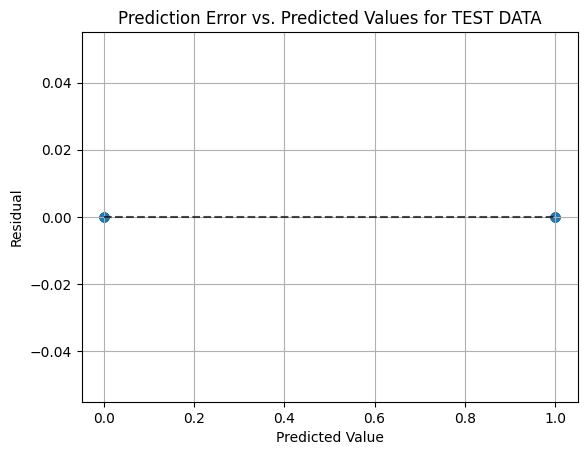

In [31]:

y_pred_train = LogReg1.predict(x_train_norm)
y_pred_test = LogReg1.predict(x_test_norm)
error_display_train = PredictionErrorDisplay(y_true=y_train[:,0], y_pred=y_pred_train)
error_display_test = PredictionErrorDisplay(y_true=y_test[:,0], y_pred=y_pred_test)

error_display_train.plot()
plt.xlabel("Predicted Value")
plt.ylabel("Residual")
plt.title("Prediction Error vs. Predicted Values for TRain DATA")
plt.grid(True)
error_display_test.plot()
plt.xlabel("Predicted Value")
plt.ylabel("Residual")
plt.title("Prediction Error vs. Predicted Values for TEST DATA")
plt.grid(True)
plt.show()

# **Question** 3


importing practical libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import sys
import random

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm

getting the data set

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1d2GNHZDt1gPiOOweR6HKO30XAYPtPMET


  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1d2GNHZDt1gPiOOweR6HKO30XAYPtPMET
To: /content/weatherHistory.csv
100% 16.3M/16.3M [00:00<00:00, 115MB/s] 


In [3]:
import pandas as pd
import csv
data = pd.read_csv('/content/weatherHistory.csv')
data


Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
0                       251.0          15.8263         0.0   
1                       259.0          15.8263         0.0   
2                       204.0          14.9569         0.0   
3                       269.0          15.8263         0.0   
4                       259.0          15.8263         0.0   
...                       ...              ...         ...   
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)                           Daily Summary  
0                   1015.13       Partly cloudy throughout the day.  
1                   1015.63       Partly cloudy throughout the day.  
2                   1015.94       Partly cloudy throughout the day.  
3                   1016.41       Partly cloudy throughout the day.  
4                   1016.51       Partly cloudy throughout the day.  
...                     ...                                     ...  
96448               1014.36  Partly cloudy starting in the morning.  
96449               1015.16  Partly cloudy starting in the morning.  
96450               1015.66  Partly cloudy starting in the morning.  
96451               1015.95  Partly cloudy starting in the morning.  
96452               1016.16  Partly cloudy starting in the morning.  

[96453 rows x 12 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


showing the header of the Excel file

In [5]:

csv_reader = csv.DictReader(data)
list(csv_reader)


[{'Formatted Date': 'Summary'},
 {'Formatted Date': 'Precip Type'},
 {'Formatted Date': 'Temperature (C)'},
 {'Formatted Date': 'Apparent Temperature (C)'},
 {'Formatted Date': 'Humidity'},
 {'Formatted Date': 'Wind Speed (km/h)'},
 {'Formatted Date': 'Wind Bearing (degrees)'},
 {'Formatted Date': 'Visibility (km)'},
 {'Formatted Date': 'Loud Cover'},
 {'Formatted Date': 'Pressure (millibars)'},
 {'Formatted Date': 'Daily Summary'}]

finding the missing values which are shown as null in the data set

In [6]:
# to find missing values
print('to find raw data')
data.isnull().sum()

to find raw data


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

the number of the data which are undefined is too small so it is acceptable to ignore them and continue with the rest of data.
here we wliminate the data including null value and then check the total data set.

In [7]:
#checking the deleted values
data = data.dropna(how='any' , axis = 0)
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [8]:
corr_data = data[['Temperature (C)' , 'Humidity' , 'Apparent Temperature (C)' ,'Wind Speed (km/h)' ,'Wind Bearing (degrees)' , 'Visibility (km)' ]]
corr_matrix = corr_data.corr()
print(corr_matrix)
#print(corr_matrix.to_latex(index = False))

                          Temperature (C)  Humidity  Apparent Temperature (C)  \
Temperature (C)                  1.000000 -0.632148                  0.992637   
Humidity                        -0.632148  1.000000                 -0.602390   
Apparent Temperature (C)         0.992637 -0.602390                  1.000000   
Wind Speed (km/h)                0.008304 -0.224569                 -0.057387   
Wind Bearing (degrees)           0.029937  0.000814                  0.028951   
Visibility (km)                  0.393719 -0.370511                  0.382589   

                          Wind Speed (km/h)  Wind Bearing (degrees)  \
Temperature (C)                    0.008304                0.029937   
Humidity                          -0.224569                0.000814   
Apparent Temperature (C)          -0.057387                0.028951   
Wind Speed (km/h)                  1.000000                0.104366   
Wind Bearing (degrees)             0.104366                1.000000   
Visibi

<Axes: >

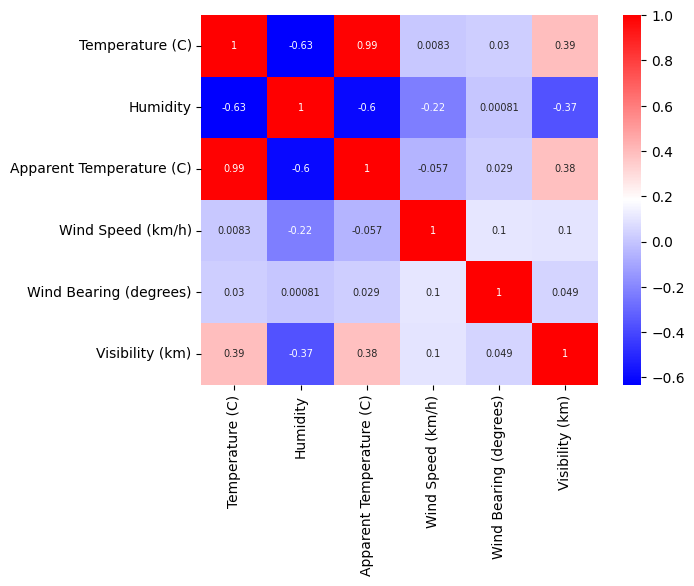

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix , cmap = 'bwr' , annot = True , annot_kws={"size": 7})

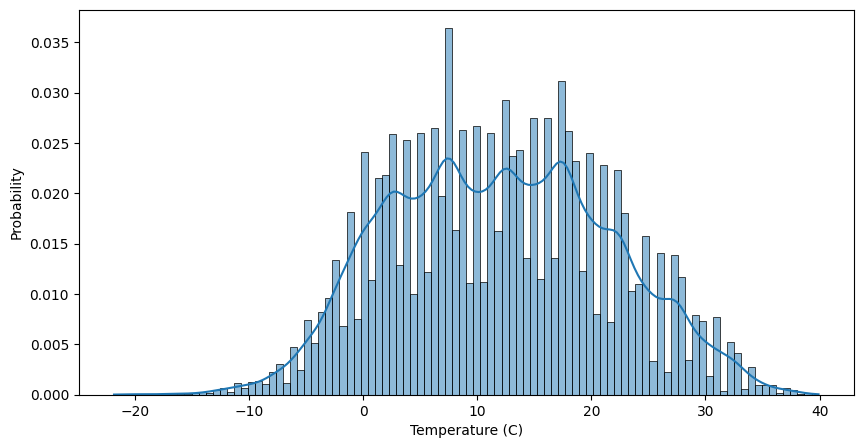

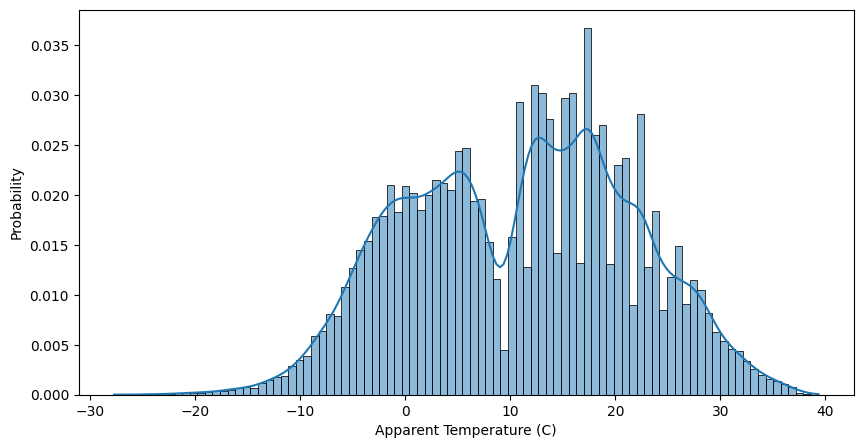

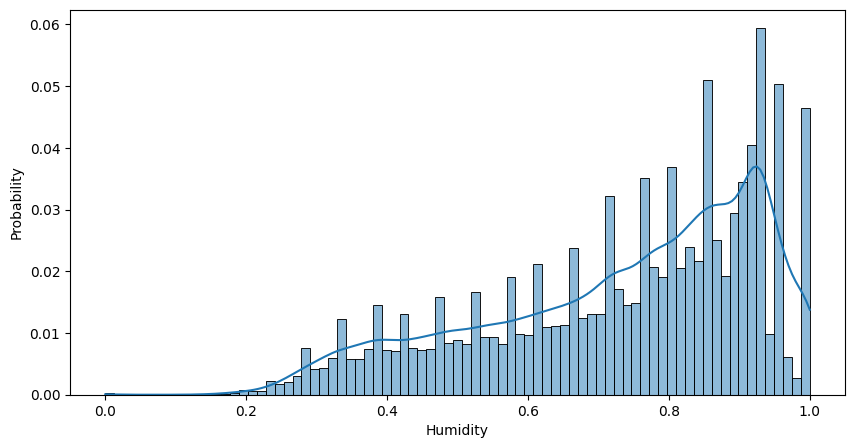

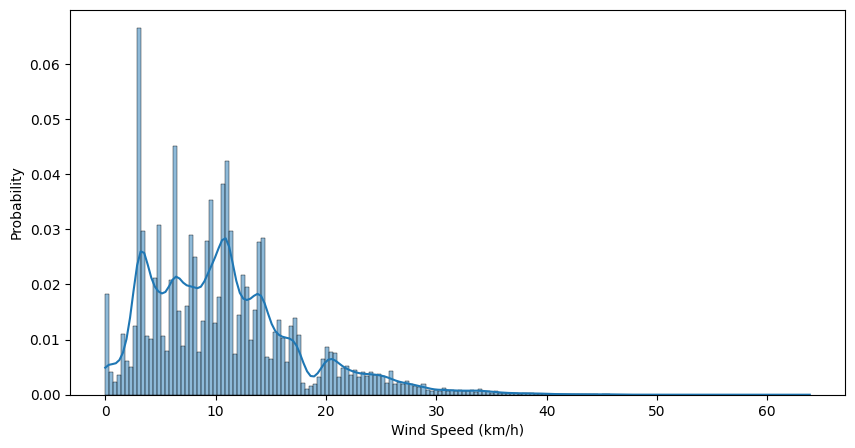

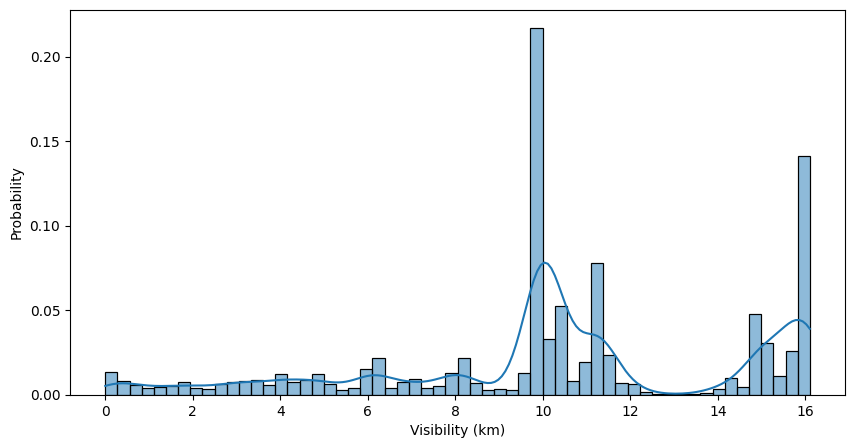

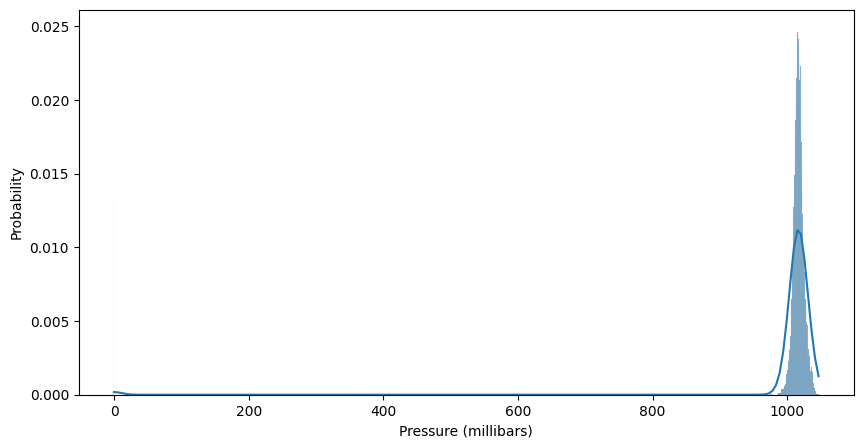

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#extract_data = data[['Temperature (C)' , 'Humidity' , 'Apparent Temperature (C)']].copy()
extract_data = data[['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']].copy()


for i ,feature in enumerate(extract_data):
  plt.figure(figsize=( 10 , 5))
  sns.histplot(data = extract_data , x = feature  , stat = 'probability' , kde = True )




In [11]:
x_train, x_test, y_train, y_test = train_test_split(data['Humidity'],data[['Temperature (C)','Apparent Temperature (C)' ]], random_state = 14, test_size = 0.2, shuffle = False)
#this section was mentioned by the simulator
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)


In [12]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionLS:
  def __init__(self):
    self.coefficients = None

  def fit(self,x,y):
    x = np.column_stack((np.ones(len(x)),x))
    self.coefficient = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

  def predict(self,x):
    x = np.column_stack((np.ones(len(x)),x))

    return x.dot(self.coefficient)


In [13]:
# x_train is Humidity
LS_1 = LinearRegressionLS()
LS_1.fit(x_train, y_train['Temperature (C)'])

ypred_LS_temp = LS_1.predict(x_train)
yhat_LS_temp = LS_1.predict(x_test)

# Calculate Mean Squared Error for test data
MSE_LS_temp = np.mean((y_test['Temperature (C)'] - yhat_LS_temp)**2)
print("MSE for the temperature based on Humidity with LS method is : ", MSE_LS_temp)

MSE for the temperature based on Humidity with LS method is :  50.66040160802141


In [14]:
#train_error
train_temp_error =  np.mean((y_train['Temperature (C)'] - ypred_LS_temp)**2)
train_temp_error

56.15249650875514

In [15]:
LS_2 = LinearRegressionLS()
LS_2.fit(x_train, y_train['Apparent Temperature (C)'])

ypred_LS_app_temp = LS_2.predict(x_train)
yhat_LS_app_temp = LS_2.predict(x_test)

# Calculate Mean Squared Error for test data
MSE_LS_app_temp = np.mean((y_test['Apparent Temperature (C)'] - yhat_LS_app_temp)**2)
print("MSE for the apparent temperature based on Humidity  with LS method is : ", MSE_LS_app_temp)

MSE for the apparent temperature based on Humidity  with LS method is :  67.12644819081983


In [16]:
#train_error
train_app_temp_error =  np.mean((y_train['Apparent Temperature (C)'] - ypred_LS_app_temp)**2)
train_app_temp_error

74.79574743572678

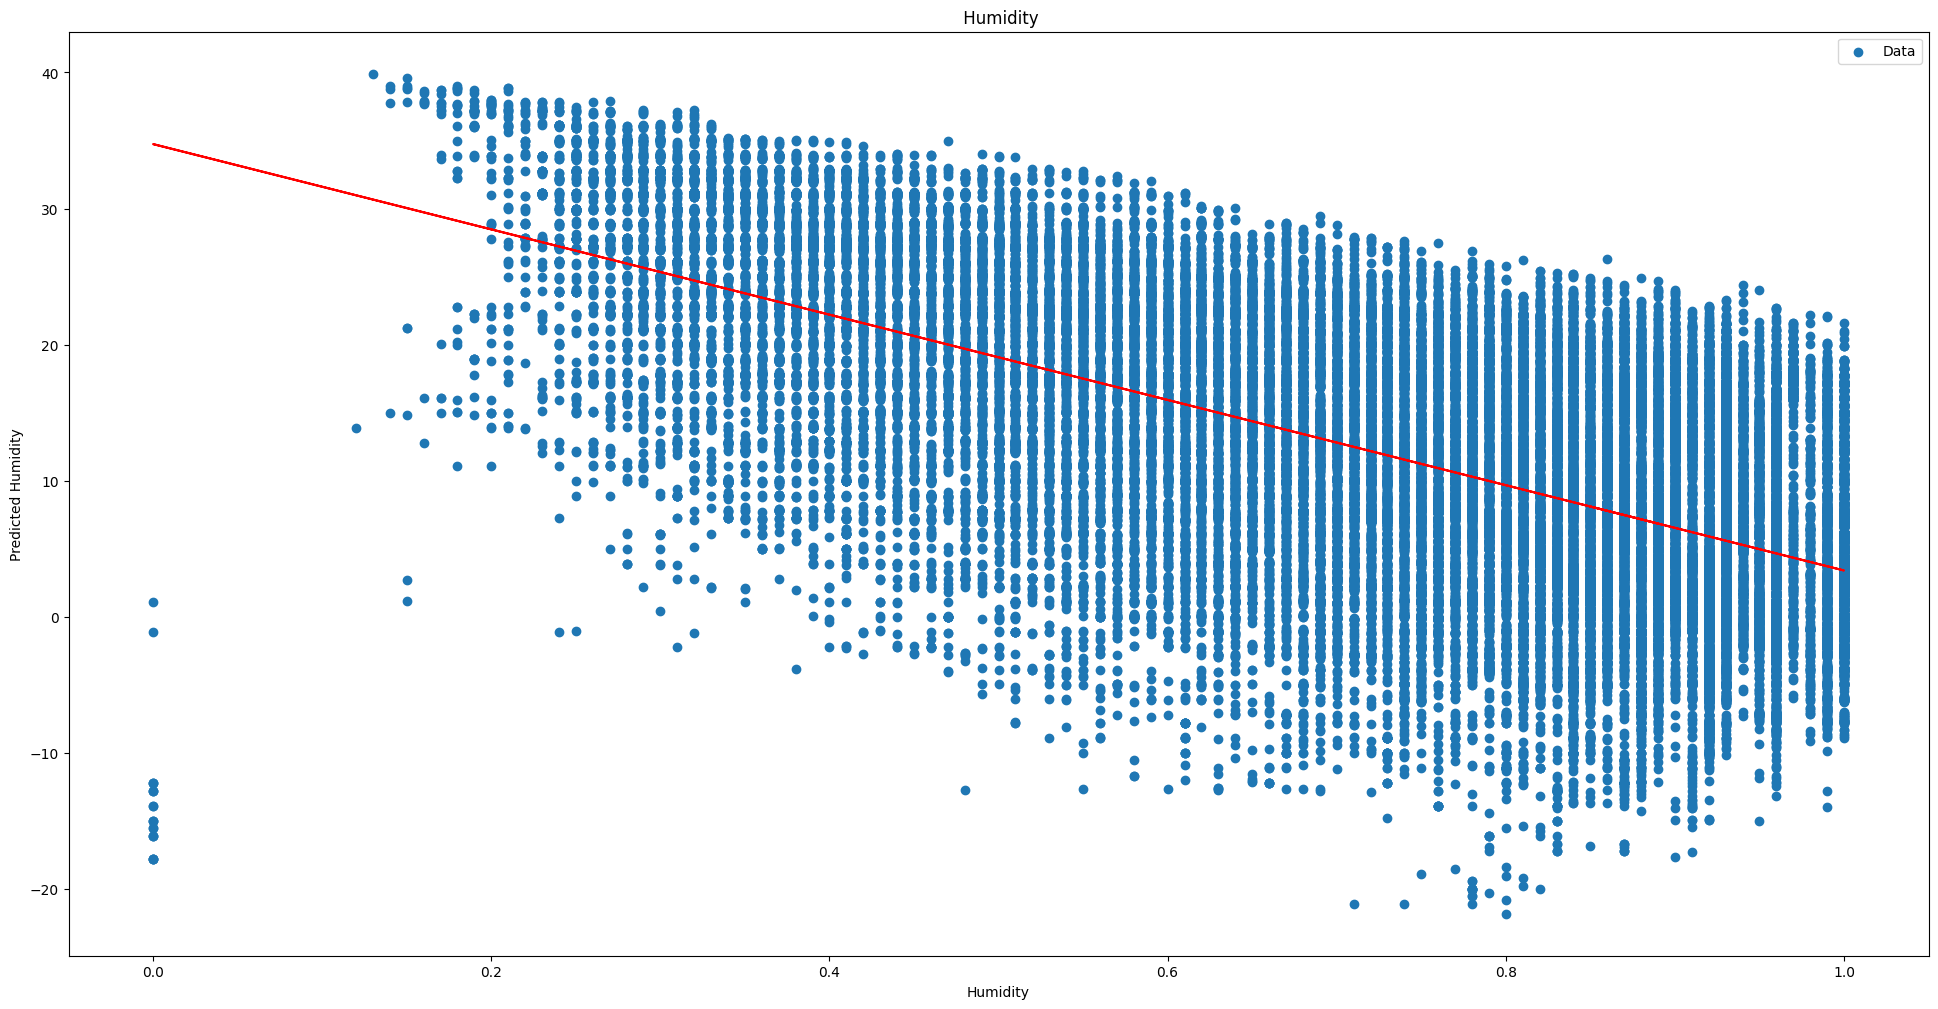

In [251]:
plt.scatter(data['Humidity'], data['Temperature (C)'],label = 'Data')
plt.plot(x_train, ypred_LS_temp, color='red')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title(" Humidity_Temperature")
plt.legend()
plt.show()

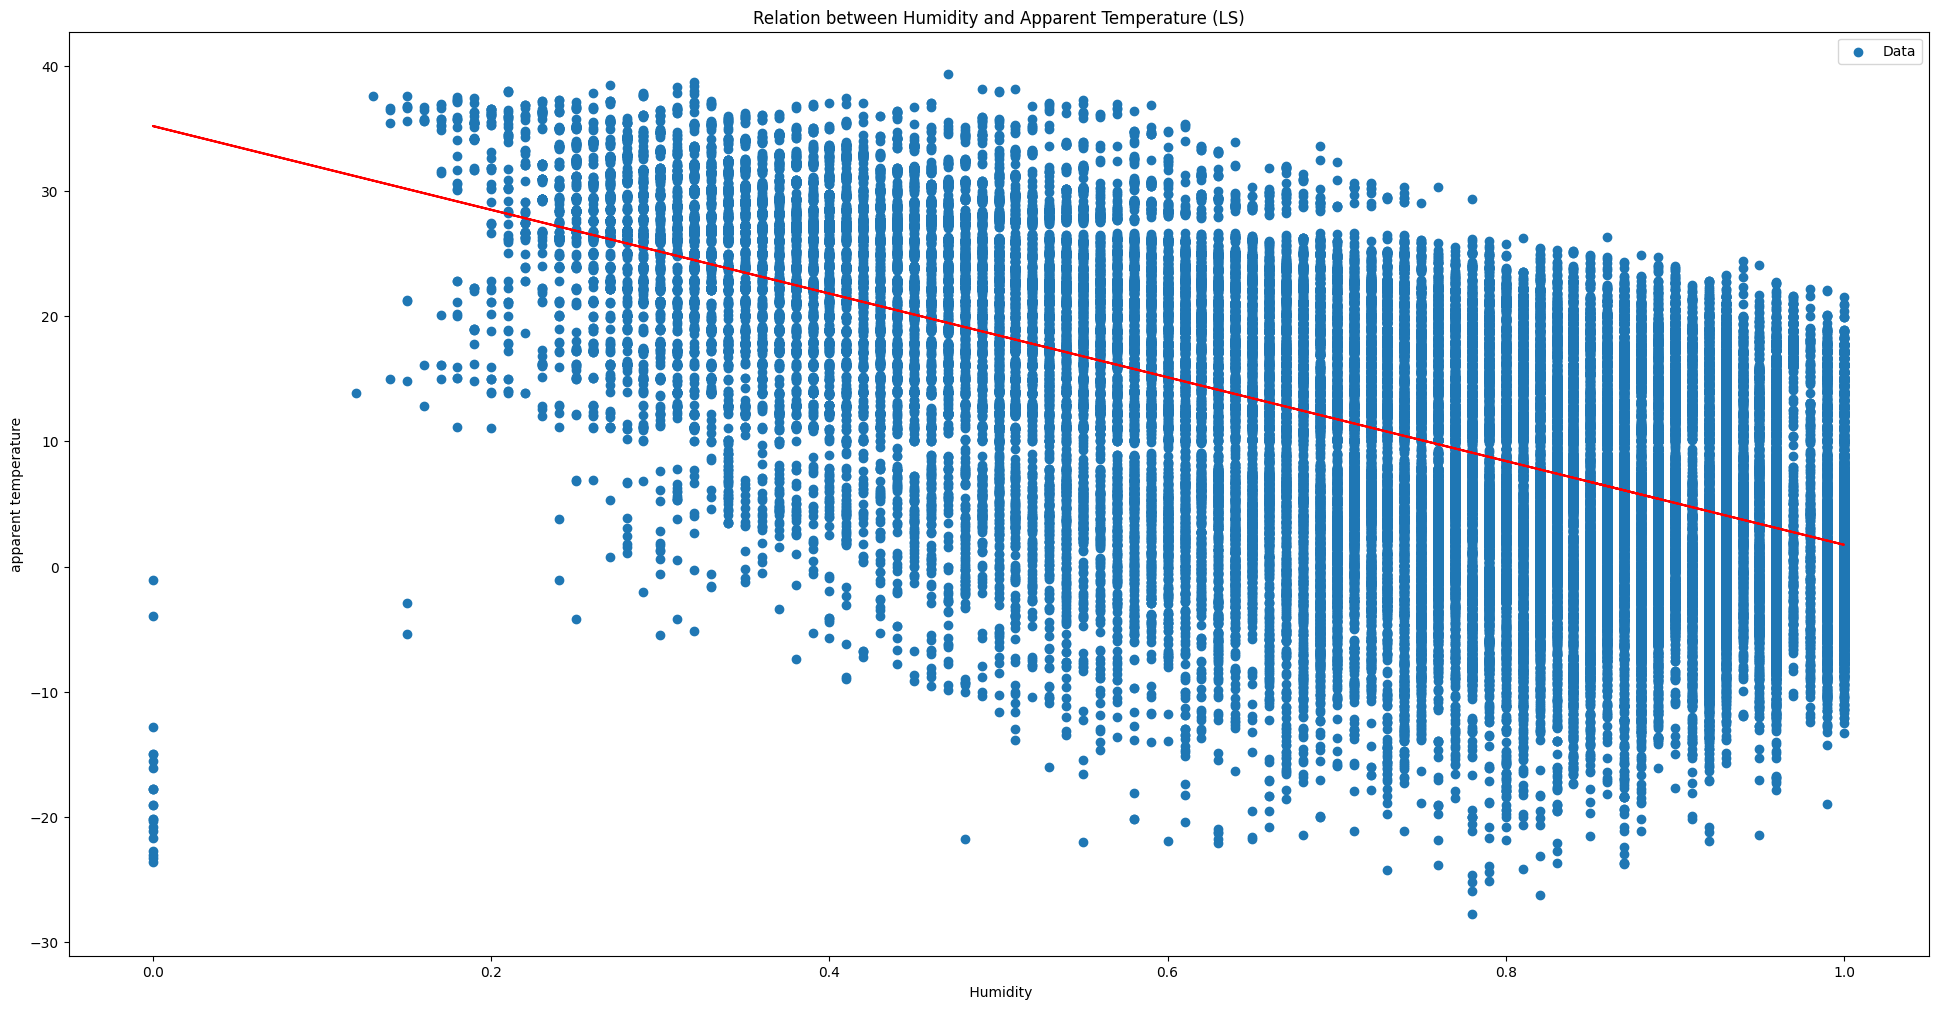

In [252]:
plt.scatter(data['Humidity'], data['Apparent Temperature (C)'], label = 'Data')
plt.plot(x_train, ypred_LS_app_temp, color='red')
plt.xlabel(" Humidity")
plt.ylabel("apparent temperature")
plt.title("Relation between Humidity and Apparent Temperature (LS)")
plt.legend()
plt.show()

In [253]:
class RecursiveLeastSquares:
    def __init__(self, n_features, forgetting_factor=0.99):
        self.n_features = n_features
        self.forgetting_factor = forgetting_factor
        self.theta = np.zeros((n_features, 1))
        self.P = np.eye(n_features)

    def fit(self, X, y):
        errors = []
        for i in range(len(X)):
            x_i = X[i].reshape(-1, 1)
            y_i = y.iloc[i]

            # Predict
            y_pred = np.dot(x_i.T, self.theta)

            # Update
            error = y_i - y_pred
            errors.append(error)
            K = np.dot(self.P, x_i) / (self.forgetting_factor + np.dot(np.dot(x_i.T, self.P), x_i))
            self.theta = self.theta + np.dot(K, error)
            self.P = (1 / self.forgetting_factor) * (self.P - np.dot(K, np.dot(x_i.T, self.P)))

        return errors

    def predict(self, X):
        return np.dot(X, self.theta)

In [254]:
RLS1 = RecursiveLeastSquares(n_features=1, forgetting_factor = 0.99)
RLS_temp_error = RLS1.fit(x_train, y_train['Temperature (C)'])

ypred_RLS_temp = RLS1.predict(x_train)

yhat_RLS_temp = RLS1.predict(x_test)

MSE_RLS_temp = np.mean(np.array(RLS_temp_error)**2)
print("MSE of Predict Temperature by RLS method", MSE_RLS_temp)

MSE of Predict Temperature by RLS method 76.51966281992084


In [255]:
RLS2 = RecursiveLeastSquares(n_features=1, forgetting_factor = 0.99)
RLS_apptemp_error = RLS2.fit(x_train, y_train['Apparent Temperature (C)'])

ypred_RLS_app_temp = RLS2.predict(x_train)

yhat_RLS_app_temp = RLS2.predict(x_test)

MSE_RLS_apptemp = np.mean(np.array(RLS_apptemp_error)**2)
print("MSE of Predict Apparent Temperature by RLS method", MSE_RLS_apptemp)

MSE of Predict Apparent Temperature by RLS method 82.00426393915465


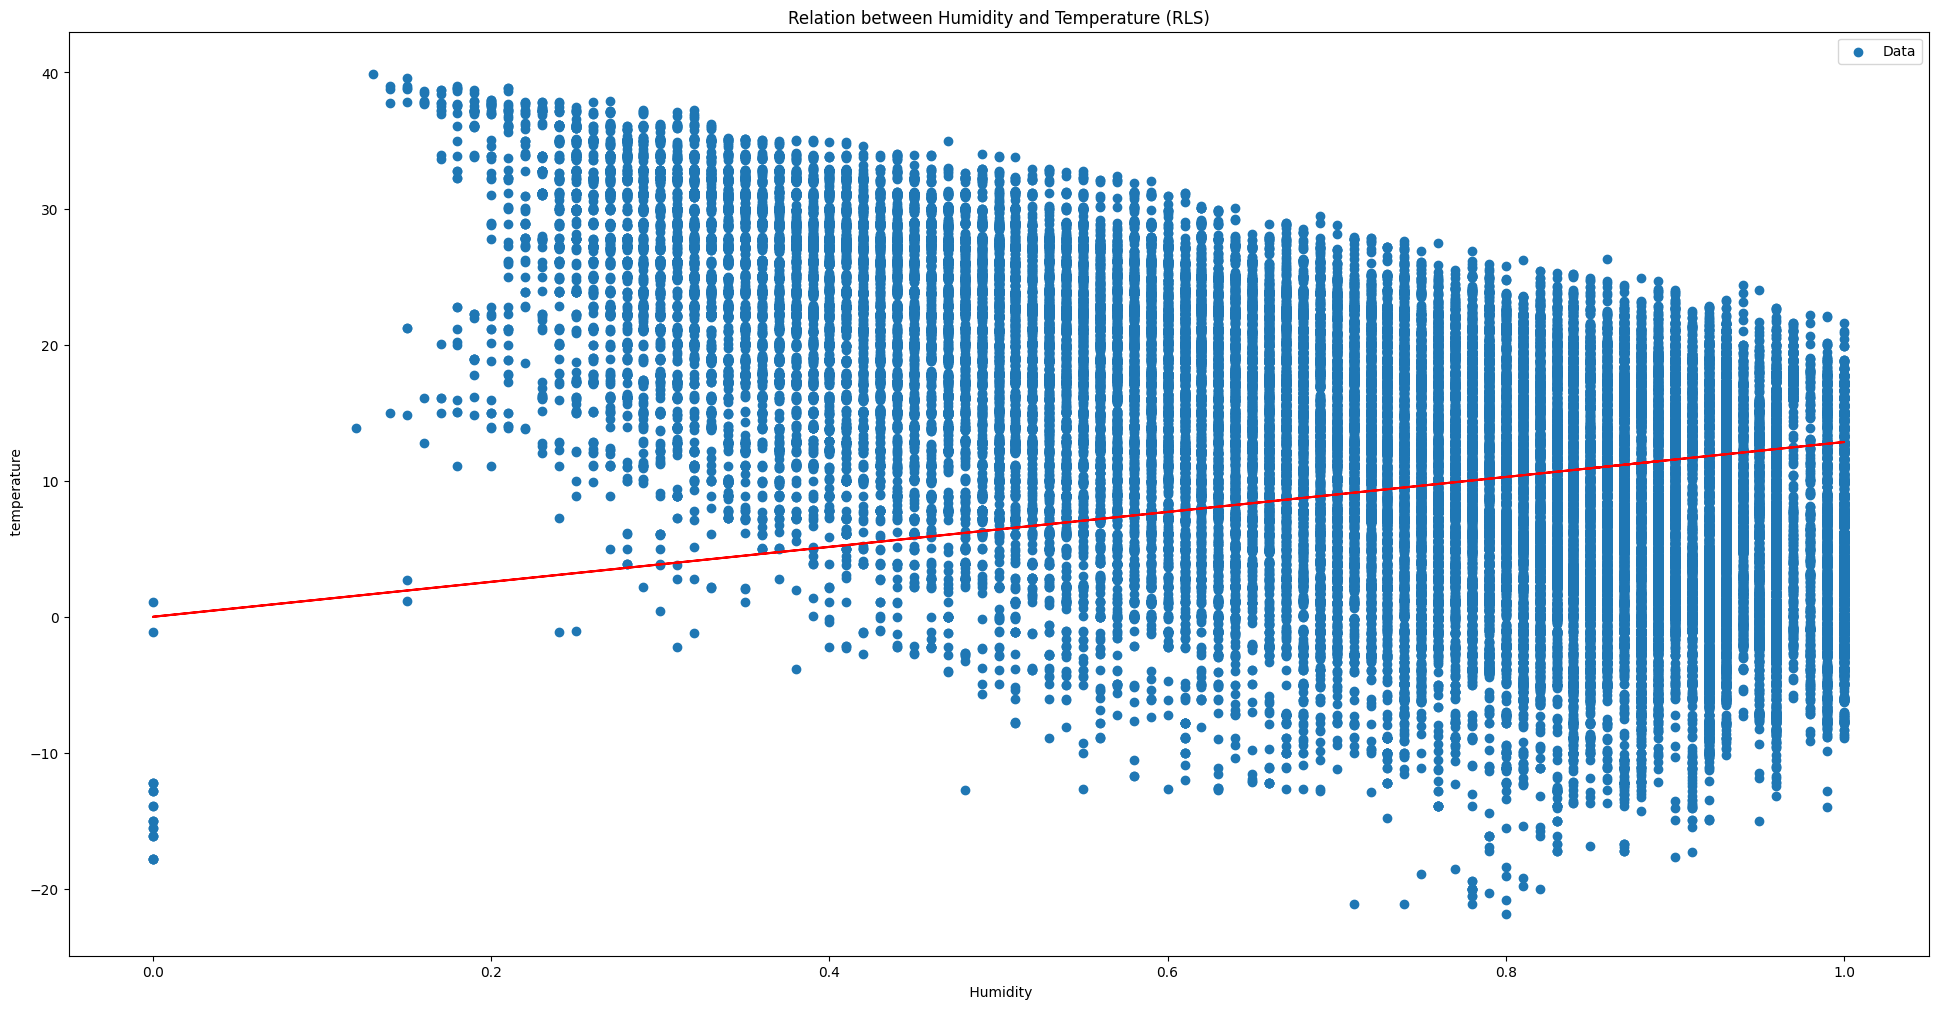

In [256]:
plt.scatter(data['Humidity'], data['Temperature (C)'], label = 'Data')
plt.plot(x_train, ypred_RLS_temp, color='red')
plt.xlabel(" Humidity")
plt.ylabel(" temperature")
plt.title("Relation between Humidity and Temperature (RLS)")
plt.legend()
plt.show()

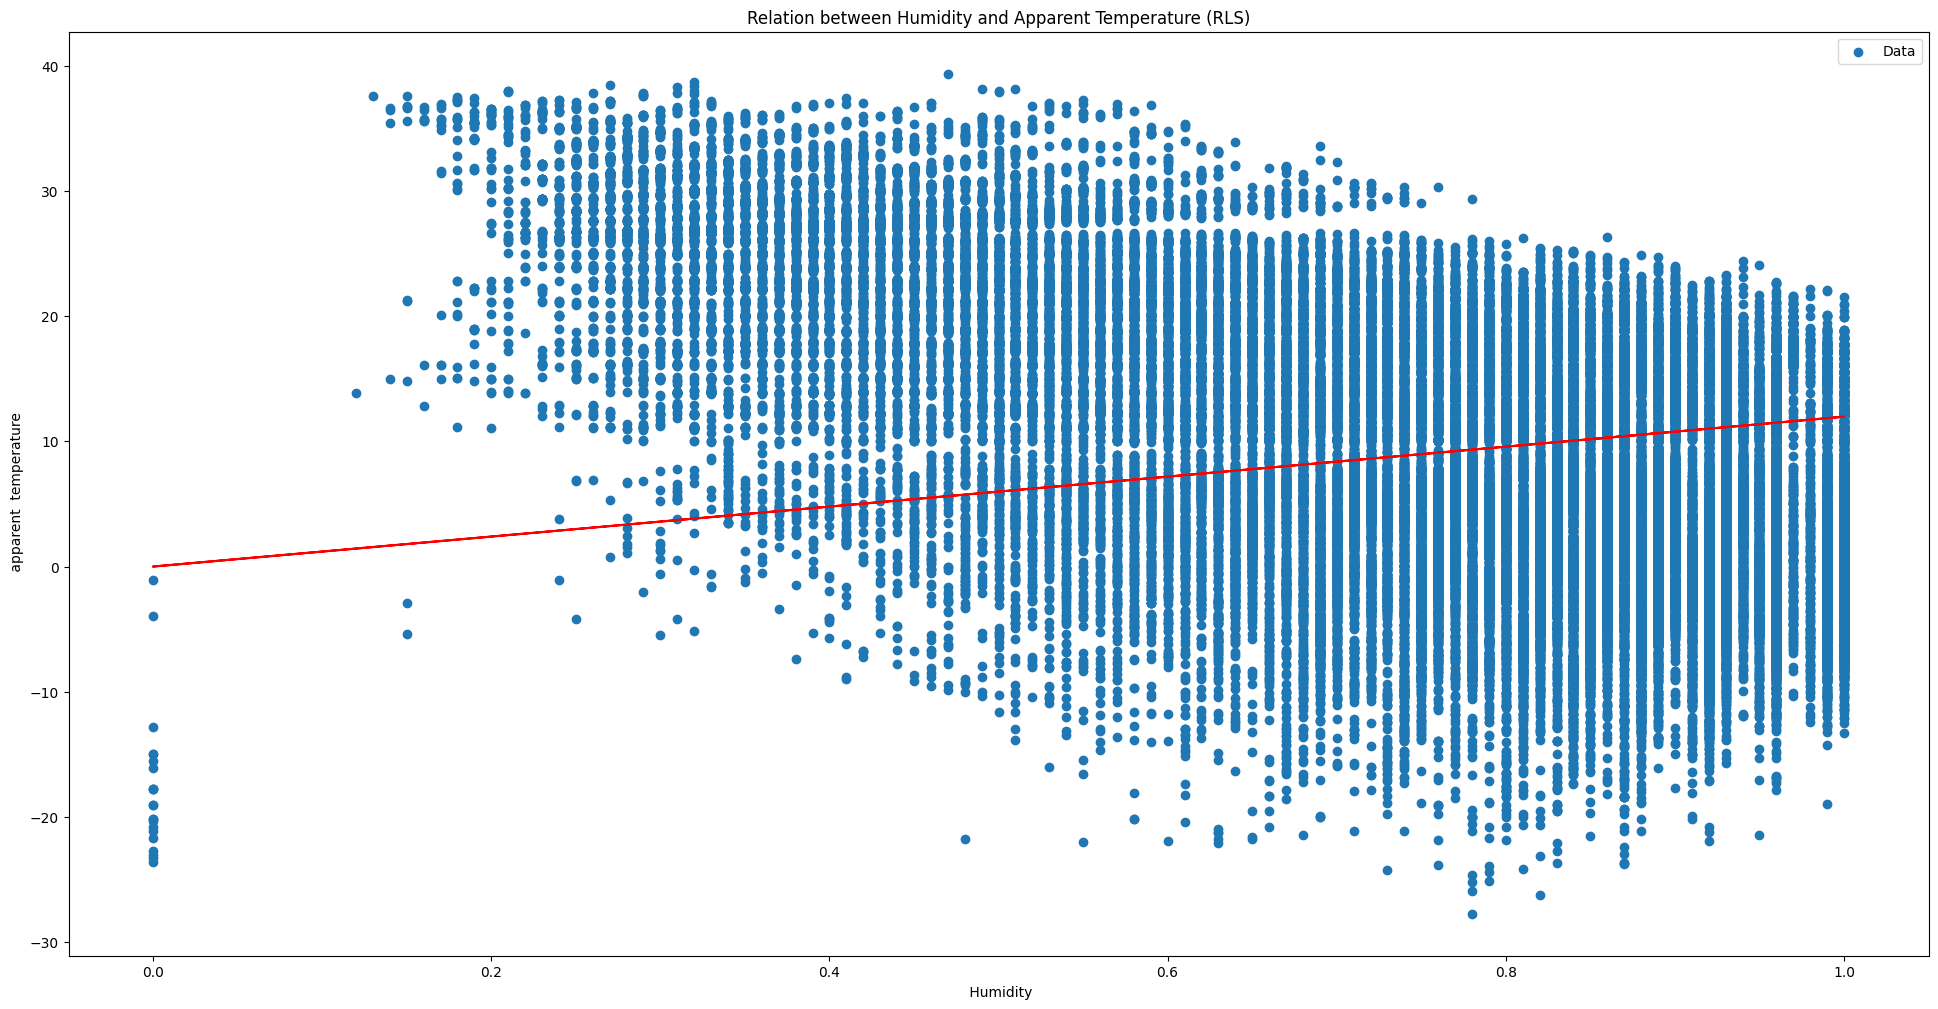

In [257]:
plt.scatter(data['Humidity'], data['Apparent Temperature (C)'], label = 'Data')
plt.plot(x_train, ypred_RLS_app_temp, color='red')
plt.xlabel(" Humidity")
plt.ylabel(" apparent  temperature")
plt.title("Relation between Humidity and Apparent Temperature (RLS)")
plt.legend()
plt.show()

PART 3

In [258]:

error_variance = 3

weights = 1 / error_variance

x_with_intercept = sm.add_constant(x_train)
WLS_temp = sm.WLS(y_train['Temperature (C)'], x_with_intercept, weights=weights)
WLS1 = WLS_temp.fit()

WLS_app_temp = sm.WLS(y_train['Apparent Temperature (C)'], x_with_intercept, weights=weights)
WLS2 = WLS_app_temp.fit()


print(f"{WLS1.summary()} \n")
print("******************************************************************************")
print(f"\n{WLS2.summary()}")

                            WLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.404
Model:                            WLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                 5.192e+04
Date:                Thu, 11 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:03:48   Log-Likelihood:            -2.6347e+05
No. Observations:               76748   AIC:                         5.270e+05
Df Residuals:                   76746   BIC:                         5.270e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.7341      0.104    334.030      0.0